## Function approximation<br><br>



The aim of this little notebook is to show the power of neural network modelling. We pick an <br>arbitrary function and by choosing many points of this function we teach the model the <br>reproduce any point in the function.

The function we use can be seen below:

f(x)=0.2+0.4x2+0.3xsin(15x)+0.05cos(50x), <br><br>which can be represented in the following form in python:<br><br>
0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X)   

In order to produce multiple outputs from one code cell we need the following code block:

In [177]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [180]:
pd.options.display.max_rows = 15

We import the necessary python modules like so:

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

<br>Since we use the keras module of python for computation we have to prepare the data in correct form for input.<br>We generate 20000 random numbers between 0 and 1 - these are going to be the elements of the feature matrix X.<br>

In [139]:
# feature matrix X
N = 20000
X = [random.uniform(0, 1) for i in range(N)]
X = np.sort(X).reshape(-1, 1)
X[:3]
X.shape

array([[6.74458970e-05],
       [8.20764748e-05],
       [2.06743531e-04]])

(20000, 1)

<br>The target vector y represents the function value at given X and is calculated the following way.<br>

In [141]:
# target vector y
y = [0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X) for i in range(1)]
y = np.array(y).reshape(-1, 1)
y[:3]
y.shape

array([[0.24999974],
       [0.24999961],
       [0.24999754]])

(20000, 1)

<br>We can take a look at what our function looks like by using the matplotlib module.<br>

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

(-0.04992437596248095,
 1.0498957049455557,
 0.05734032366573157,
 0.8907499984700855)

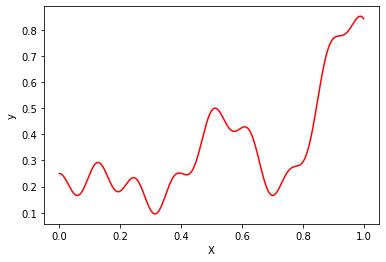

In [146]:
plt.plot(X, y, 'r-')

plt.xlabel('X')
plt.ylabel('y')
plt.axis('tight')
plt.show()

In [40]:
from sklearn import preprocessing

In [41]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scale = min_max_scaler.fit_transform(X)
#y_scale = min_max_scaler.fit_transform(y)


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # new block

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam

<br>We decide what our model should look like. Three hidden layers are constructed with neuron numbers of 100, 32, 32 respectively. The shape of the input data is given as an argumen on the first hidden layer .<br>

In [187]:
model = Sequential()
model.add(Dense(100, input_shape = (1,), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

<br>I leave the following code cell in the notebook although it's only needed if we want to delete the model and the tensorflow graph underneath and start over again.<br>

In [186]:
del model
tf.keras.backend.clear_session()

<br>The model is actualy put together in the cell below.<br>

In [162]:
model.compile(loss='mse', optimizer= Adam(), metrics=['accuracy'])

<br>The model and the dataset meet for the first time below and fine tuning is going to take place. The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument.<br>

In [163]:
# fit the keras model on the dataset
model.fit(X, y, epochs=2, batch_size=30)

Epoch 1/2
667/667 [==============================] - 1s 1ms/step - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 2/2
667/667 [==============================] - 1s 1ms/step - loss: 0.0143 - accuracy: 0.0000e+00


<br>After the fitting process is over we can have a look at how close the model predictions are to our function.<br>We use the same data set base X for this.<br> red line: our original function <br> blue dotted line: model predictions<br><br>Number of epochs means number of iterations over the complete data set.<br><br>After 2 epochs our model prediction is far away from reality.<br>

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04992437596248095,
 1.0498957049455557,
 0.05388052229645304,
 0.9634058272249346)

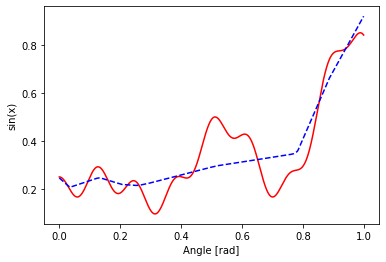

In [164]:
# plotting the curves
import matplotlib.pylab as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

<br>Let'do another run with 20 epochs.<br>

In [165]:
# fit the keras model on the dataset
model.fit(X, y, epochs=20, batch_size=30)

Epoch 1/20
667/667 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 2/20
667/667 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 3/20
667/667 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 4/20
667/667 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 5/20
667/667 [==============================] - 1s 1ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 6/20
667/667 [==============================] - 1s 2ms/step - loss: 9.1608e-04 - accuracy: 0.0000e+00
Epoch 7/20
667/667 [==============================] - 1s 1ms/step - loss: 8.7021e-04 - accuracy: 0.0000e+00
Epoch 8/20
667/667 [==============================] - 1s 1ms/step - loss: 8.1774e-04 - accuracy: 0.0000e+00
Epoch 9/20
667/667 [==============================] - 1s 1ms/step - loss: 8.0496e-04 - accuracy: 0.0000e+00
Epoch 10/20
667/667 [===========================

After another 20 iterations the result is still not satisfactory.

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04992437596248095,
 1.0498957049455557,
 0.05321720413204918,
 0.8909463374954989)

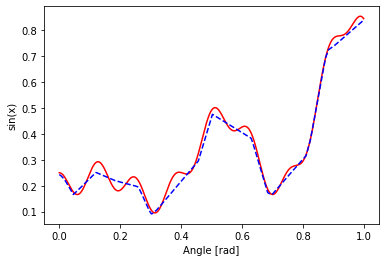

In [168]:
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

<br>To cut the long story short we need much more iteration to get decent results.<br>

In [169]:
# fit the keras model on the dataset
model.fit(X, y, epochs=200, batch_size=30)

Epoch 1/200
667/667 [==============================] - 1s 1ms/step - loss: 6.3051e-04 - accuracy: 0.0000e+00
Epoch 2/200
667/667 [==============================] - 1s 1ms/step - loss: 6.0681e-04 - accuracy: 0.0000e+00
Epoch 3/200
667/667 [==============================] - 1s 1ms/step - loss: 5.3327e-04 - accuracy: 0.0000e+00
Epoch 4/200
667/667 [==============================] - 1s 1ms/step - loss: 5.4756e-04 - accuracy: 0.0000e+00
Epoch 5/200
667/667 [==============================] - 1s 1ms/step - loss: 4.7419e-04 - accuracy: 0.0000e+00
Epoch 6/200
667/667 [==============================] - 1s 1ms/step - loss: 4.6172e-04 - accuracy: 0.0000e+00
Epoch 7/200
667/667 [==============================] - 1s 1ms/step - loss: 4.9066e-04 - accuracy: 0.0000e+00
Epoch 8/200
667/667 [==============================] - 1s 1ms/step - loss: 3.8902e-04 - accuracy: 0.0000e+00
Epoch 9/200
667/667 [==============================] - 1s 1ms/step - loss: 4.3791e-04 - accuracy: 0.0000e+00
Epoch 10/200
667/66

667/667 [==============================] - 1s 1ms/step - loss: 1.3794e-04 - accuracy: 0.0000e+00
Epoch 150/200
667/667 [==============================] - 1s 1ms/step - loss: 1.7479e-04 - accuracy: 0.0000e+00
Epoch 151/200
667/667 [==============================] - 1s 1ms/step - loss: 1.5669e-04 - accuracy: 0.0000e+00
Epoch 152/200
667/667 [==============================] - 1s 1ms/step - loss: 1.7304e-04 - accuracy: 0.0000e+00
Epoch 153/200
667/667 [==============================] - 1s 1ms/step - loss: 1.9329e-04 - accuracy: 0.0000e+00
Epoch 154/200
667/667 [==============================] - 1s 1ms/step - loss: 1.6077e-04 - accuracy: 0.0000e+00
Epoch 155/200
667/667 [==============================] - 1s 1ms/step - loss: 1.7314e-04 - accuracy: 0.0000e+00
Epoch 156/200
667/667 [==============================] - 1s 1ms/step - loss: 1.4064e-04 - accuracy: 0.0000e+00
Epoch 157/200
667/667 [==============================] - 1s 1ms/step - loss: 1.9442e-04 - accuracy: 0.0000e+00
Epoch 158/200
6

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04992437596248095,
 1.0498957049455557,
 0.05690861706497721,
 0.899815837085927)

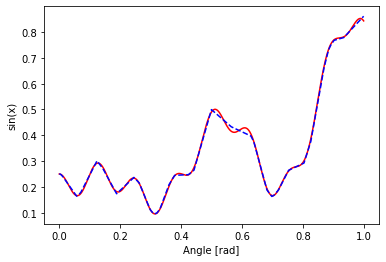

In [171]:
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

<br>It is getting better.<br>

And another 50 epochs...

In [173]:
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=30)

Epoch 1/50
667/667 [==============================] - 1s 1ms/step - loss: 1.4083e-04 - accuracy: 0.0000e+00
Epoch 2/50
667/667 [==============================] - 1s 1ms/step - loss: 1.2650e-04 - accuracy: 0.0000e+00
Epoch 3/50
667/667 [==============================] - 1s 1ms/step - loss: 1.4476e-04 - accuracy: 0.0000e+00
Epoch 4/50
667/667 [==============================] - 1s 1ms/step - loss: 2.9319e-04 - accuracy: 0.0000e+00
Epoch 5/50
667/667 [==============================] - 1s 1ms/step - loss: 9.0439e-05 - accuracy: 0.0000e+00
Epoch 6/50
667/667 [==============================] - 1s 1ms/step - loss: 1.3762e-04 - accuracy: 0.0000e+00
Epoch 7/50
667/667 [==============================] - 1s 1ms/step - loss: 1.1756e-04 - accuracy: 0.0000e+00
Epoch 8/50
667/667 [==============================] - 1s 1ms/step - loss: 1.1137e-04 - accuracy: 0.0000e+00
Epoch 9/50
667/667 [==============================] - 1s 1ms/step - loss: 1.3252e-04 - accuracy: 0.0000e+00
Epoch 10/50
667/667 [=======

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04992437596248095,
 1.0498957049455557,
 0.05707853458163033,
 0.8907624646169474)

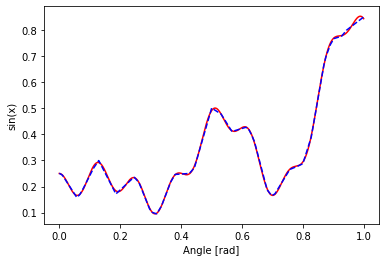

In [175]:
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

I am not saying it is perfect but it is getting very close.